<a href="https://colab.research.google.com/github/d-melamed/DS-Unit-1-Sprint-2-Statistics/blob/master/DM_Copy_of_Unit_1_Sprint_2_Statistics_Study_Guide.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This study guide should reinforce and provide practice for all of the concepts you have seen in the past week. There are a mix of written questions and coding exercises, both are equally important to prepare you for the sprint challenge as well as to be able to speak on these topics comfortably in interviews and on the job.

If you get stuck or are unsure of something remember the 20 minute rule. If that doesn't help, then research a solution with google and stackoverflow. Only once you have exausted these methods should you turn to your Team Lead - they won't be there on your SC or during an interview. That being said, don't hesitate to ask for help if you truly are stuck.

Have fun studying!

# Resources

[Scipy Stats Documentation](https://docs.scipy.org/doc/scipy/reference/stats.html)

# General Terms

Define the following terms. *Double click the text to edit the markdown cells.*
<br/><br/>

**Normal Distribution:** `type of continuous probability distribution for a real-valued random variable. It's a symmetric distribution where most of the observations cluster around the central peak and the probabilities for values further away from the mean taper off equally in both directions`

**Standard Deviation:** `the measure of variation within a set of measurements (sample)`

**Z-Score:** `a measure of how many standard deviations below or above the population mean a raw score`

**P-Value:** `the probability of obtaining test results at least as extreme as the results actually observed`

**Null Hypothesis:** `the hypothesis that there is no significant difference between specified populations, any observed difference being due to sampling or experimental error. AKA the "boring" hypothesis`

**Sample:** `a set of individuals collected or selected from a statistical population by a defined procedure`

**Statistical Signifigance:** `a result has statistical significance when it is very unlikely to have occurred given the null hypothesis`

# T-Test

Answer the following questions as though you are explaining it to a non-technical person. *Double click the text to edit the markdown cells.*
<br/><br/>

1. What is a T-Test? What is it used for?

  `T-test is used to determine whether there is a significant difference between the means of two groups`

2. What is the difference between the normal distribution and the t-distribution?

  ` Normal distributions are used when the population distribution is assumed to be normal. The T distribution is similar to the normal distribution, just with fatter tails. Both assume a normally distributed population. The probability of getting values very far from the mean is larger with a T distribution than a normal distribution `

3. What is the difference between a 1-sample and a 2-sample t-test?

  ` 1-sample t-tests determine whether or not a sample mean is statistically different from some known (or hypothesized) population mean. 2-sample t-tests determine whether or not one sample mean is statistically different from the other sample mean. `

We are scientists running a drug trial and wanting to know whether our drug reduced patient symptoms. Below are the results (just random numbers), explain in 2-3 sentences whether or not the drug was effective. How can we tell that from the t-test?

```
Since the p value is 0.68, we fail to reject the null hypothesis, so there is not enough evidence to suggest that the drug reduced patients symptoms.
```

What is likely our null hypothesis?

```
Our null hypothesis would be that the patients symptoms on the drug would be equal to patients symptoms not on the drug.
```

In [27]:
from scipy import stats
import numpy as np
import pandas as pd

# Get our "results" with random numbers
np.random.seed(42)
with_drug = stats.norm.rvs(loc=5, scale=10, size=500)
without_drug = stats.norm.rvs(loc=5, scale=10, size=500)

# See if our drug made a difference
stats.ttest_ind(with_drug, without_drug)

Ttest_indResult(statistic=-0.40331379088750186, pvalue=0.6868037874359643)

Here is a dataframe of movie ratings. Divide the dataframe by gender and then use t-tests to show which movies have a statistically significant difference in rating when divided by gender. Give a sentence explanation of the results.

In [28]:
df = pd.DataFrame({'gender':['m','f','f','m','m','m','f','f','m','f'],
                   'jurassic park':[10,9,10,9,9,10,10,10,9,9],
                   'love actually':[6,9,10,7,6,7,10,10,5,8],
                   'pacific rim':[10,3,4,8,9,8,5,4,9,3]})
df.head()

,gender,jurassic park,love actually,pacific rim
0,m,10,6,10
1,f,9,9,3
2,f,10,10,4
3,m,9,7,8
4,m,9,6,9


In [29]:
# Divide the dataframe here

condition = df['gender'] == 'm'

df_male = df[condition]

In [30]:
condition2 = df['gender'] == 'f'

df_female = df[condition2]

In [31]:
df_male.head()

,gender,jurassic park,love actually,pacific rim
0,m,10,6,10
3,m,9,7,8
4,m,9,6,9
5,m,10,7,8
8,m,9,5,9


In [32]:
df_female.head()

,gender,jurassic park,love actually,pacific rim
1,f,9,9,3
2,f,10,10,4
6,f,10,10,5
7,f,10,10,4
9,f,9,8,3


In [33]:
df.isnull().sum()

gender           0
jurassic park    0
love actually    0
pacific rim      0
dtype: int64

In [34]:
print(df_male['jurassic park'].mean())

print(df_female['jurassic park'].mean())

9.4
9.6


In [35]:
df_male.describe()

,jurassic park,love actually,pacific rim
count,5.000000,5.00000,5.00000
mean,9.400000,6.20000,8.80000
std,0.547723,0.83666,0.83666
min,9.000000,5.00000,8.00000
25%,9.000000,6.00000,8.00000
50%,9.000000,6.00000,9.00000
75%,10.000000,7.00000,9.00000
max,10.000000,7.00000,10.00000


In [36]:
df_female.describe()

,jurassic park,love actually,pacific rim
count,5.000000,5.000000,5.00000
mean,9.600000,9.400000,3.80000
std,0.547723,0.894427,0.83666
min,9.000000,8.000000,3.00000
25%,9.000000,9.000000,3.00000
50%,10.000000,10.000000,4.00000
75%,10.000000,10.000000,4.00000
max,10.000000,10.000000,5.00000


**Jurassic Park**

Explanation of results:

```
Since the p value is 0.6, we fail to reject the null hypothesis, which is that the male mean score for Jurassic Park is equal to the female mean score. Therefore, there is no stat sig difference between male and female scores for Jurassic Park.
```

In [37]:
# T-Test Code Here

stats.ttest_ind(df_male['jurassic park'], df_female['jurassic park'])

Ttest_indResult(statistic=-0.5773502691896236, pvalue=0.5795840000000014)

**Love Actually**

Explanation of results:

```
Since the p value is 0.0004, we reject the null hypothesis, which is that the male mean score for Love Actually is equal to the female mean score. Females preferred the movie over males (negative t-stat).

```

In [38]:
# T-Test Code Here
stats.ttest_ind(df_male['love actually'], df_female['love actually'])

Ttest_indResult(statistic=-5.8423739467217715, pvalue=0.0003861022071216145)

**Pacific Rim**

Explanation of results:

```
Since the p value is .000013, we reject the null hypothesis, which is that the male mean score for Love Actually is equal to the female mean score. Males preferred the movie over females (positive t-stat).

```

In [39]:
# T-Test Code Here

stats.ttest_ind(df_male['pacific rim'], df_female['pacific rim'])

Ttest_indResult(statistic=9.449111825230684, pvalue=1.2936944097439082e-05)

# Confidence Interval

Answer the following question as though you are explaining it to a non-technical person. *Double click the text to edit the markdown cells.*
<br/><br/>

1. What is a confidence interval?

  ` How confident you are in your answer. So 99% confidence interval means that you are 99% confident that your range will contain the true population mean/average `

In [40]:
def confidence_interval(sample, confidence_level=.95):
  # make sure we're working with a numpy array
  sample = np.array(sample)
  # sample mean
  x_bar = np.mean(sample)
  # SAMPLE standard deviation EXTRA PARAMETER!
  # numpy default give population standard devation (ddof=1) helps with this
  s = np.std(sample, ddof=1)
  # sample size
  n = len(sample)
  # t-statistic for our confidence level %
  # numpy by default gives only 1 tailed t-stat -
  # need 1- added to (1-confid_lvl/2, n-1)
  t = stats.t.ppf((1+confidence_level)/2, n-1)

  std_err = s / np.sqrt(n)

  moe = t * std_err

  lower_bound = x_bar - moe
  upper_bound = x_bar + moe

  return (lower_bound, x_bar, upper_bound, moe)

In [41]:
CI1 = confidence_interval(df['jurassic park'], confidence_level=.95)

CI1

(9.122973806209835, 9.5, 9.877026193790165, 0.3770261937901652)

In [42]:
CI2 = confidence_interval(df['love actually'], confidence_level=.95)

CI2

(6.459567155669003, 7.8, 9.140432844330997, 1.3404328443309967)

In [43]:
CI3 = confidence_interval(df['pacific rim'], confidence_level=.95)

CI3

(4.332226646206882, 6.3, 8.267773353793118, 1.9677733537931181)

Using the movie rating data, graph the ratings with a confidence interval. After graphing the ratings with the confidence interval, write a brief explanation of how to interpret the graph.

```
Pacific Rim is the most polarizing movie, while there is consensus around Jurassic Park.
```

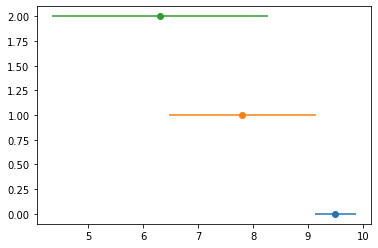

In [45]:
import matplotlib.pyplot as plt

plt.errorbar(x=CI1[1], y=0, xerr=CI1[3], fmt='o')
plt.errorbar(x=CI2[1], y=1, xerr=CI2[3], fmt='o')
plt.errorbar(x=CI3[1], y=2, xerr=CI3[3], fmt='o')


plt.show()

# Chi Squared

Answer the following questions as though you are explaining it to a non-technical person. *Double click the text to edit the markdown cells.*
<br/><br/>

1. What is a Chi Squared Test? What is it used for?

  ` Chi^2 test is one that is used to test whether two categorical variables are related or independent. It is used to confirm if one variable is dependent on another. `

2. What type of data is it used on?

  ` Categorical variables - so ones that are of a limited, and usually fixed, number of possible values. A good example is hair color.`

3. What is a contingency table?

  ` A table that summarizes the relationship between several categorical variables in terms of frequency counts `

4. Define Degrees of Freedom

  ` The maximum number of logically independent values, or the "freedom" to vary, in a data sample `

Use the `grades` dataframe below to complete the following:
- Create at least 2 contingency tables
- Use chi-squared tests to find 2 features that are independent of each other.
 - Write a brief interpretation of the results
- Use chi-squared tests to find 2 features that are dependent to each other.
 - Write a brief interpretation of the results

In [ ]:
grades = pd.DataFrame({'good_standing':[True, True, False, False, False, True, True, False, True, True],
                       'grade_1':['A', 'B', 'A', 'C', 'A', 'A', 'D', 'A', 'B', 'B'],
                       'grade_2':['Pass', 'Pass', 'Fail', 'Fail', 'Fail','Pass', 'Pass', 'Fail', 'Pass', 'Fail'],
                       'grade_3':[10, 5, 6, 10, 9, 9, 8, 7, 3, 9]})
grades.head()

In [ ]:
# Contingency Table 1

ct1 = pd.crosstab(grades['grade_1'], grades['grade_2'])

ct1

In [ ]:
# Contingency Table 2

ct2 = pd.crosstab(grades['grade_2'], grades['grade_3'])

ct2

In [ ]:
# Chi Squared, independent features

from scipy.stats import chi2_contingency

g, p1, dof, expected = chi2_contingency(ct1)

p1

In [ ]:
# Chi Squared, dependent features

g, p2, dof, expected = chi2_contingency(pd.crosstab(grades['good_standing'], grades['grade_2']))

p2

At a 90% confidence level, good standing is related to grade 2, since the p value is 0.05, so it's likely that the grade a student receives for grade 2 is related to whether or not they are in good standing.

Grades on 1 and 2 are not related to each other, since the p value is .47. So they are not dependent on each other.

# Bayesian Statisics

Answer the following questions as though you are explaining it to a non-technical person. *Double click the text to edit the markdown cells.*
<br/><br/>

1. What is the difference between Bayesian and Frequentist Statistics?

  ` Bayesian statistics starts from what has been observed and assesses possible future outcomes. Frequentist statistics starts with an abstract experiment of what would be observed if one assumes something, and only then compares the outcomes of the abstract experiment with what was actually observed `

2. What is a prior belief? How is it used in Bayesian Statistics?

  ` Prior beliefs are the start of Bayesian statistics, so the belief that something might happen based on prior knowledge or results. They are then updated using data to give 'posterior' beliefs, which may be used as the basis for inferential decisions. `

3. What is the law of total probability?

  ` It expresses the total probability of an outcome which can be realized via several distinct events `

4. What is the law of conditional probability?

  ` A measure of the probability of an event occurring given that another event has occurred `

5. Give an example of when you might use bayesian statistics. Do not use an example given during the lecture or assignment.

  ` Finding true positive COVID-19 players in the NBA bubble. `

# Graphing

Use any of the dataframes above and make two additional visualizations to explore the data. Make sure to include axis labels and title for each graph.

In [ ]:
grades.plot.scatter('grade_1', 'grade_3', c='red');

In [ ]:
ax = pd.crosstab(df['gender'], df['jurassic park']).plot(kind='bar', title = "Jurassic Park Ratings: Females vs. Males");
ax.set_ylabel("Count of Ratings");